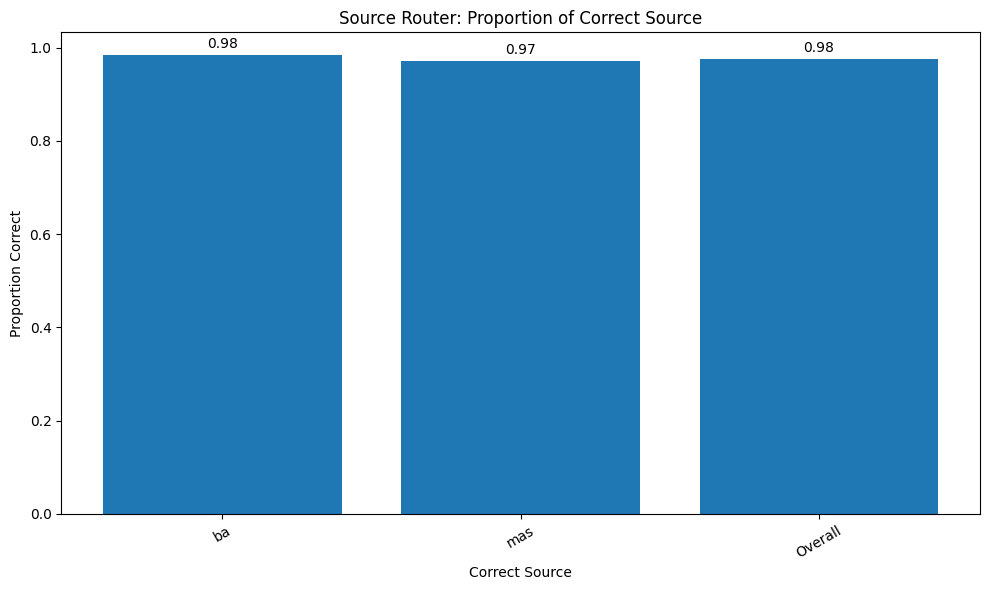

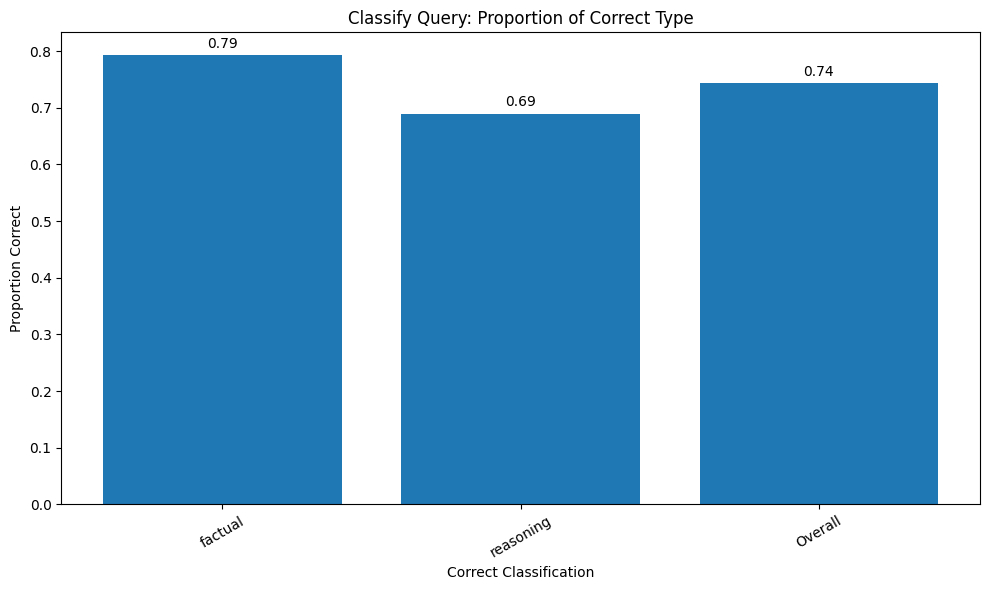

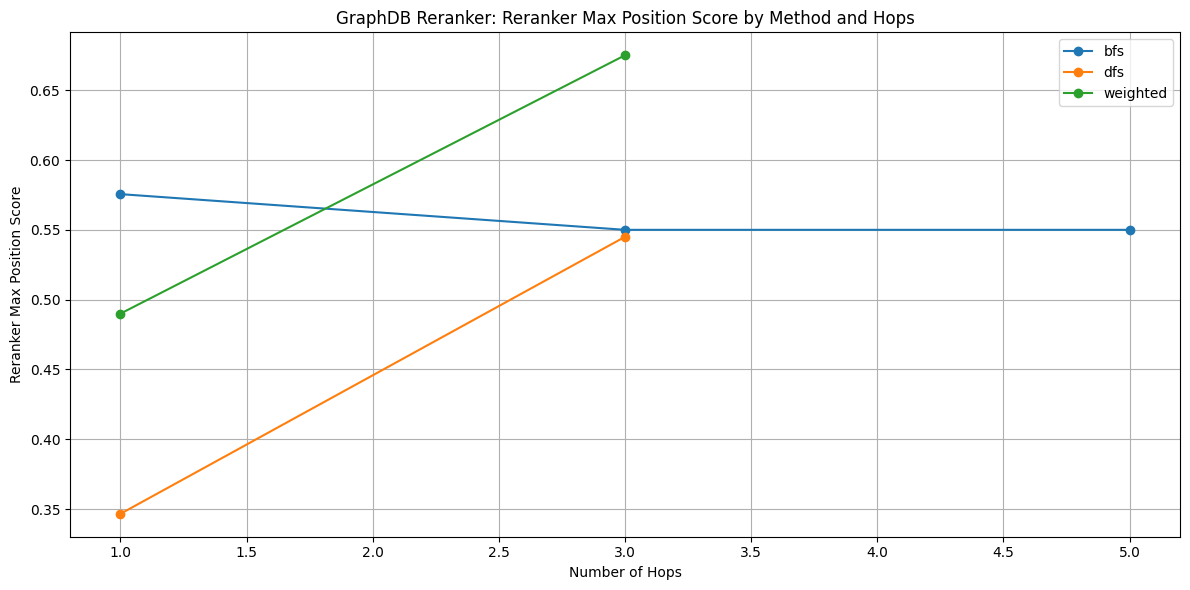

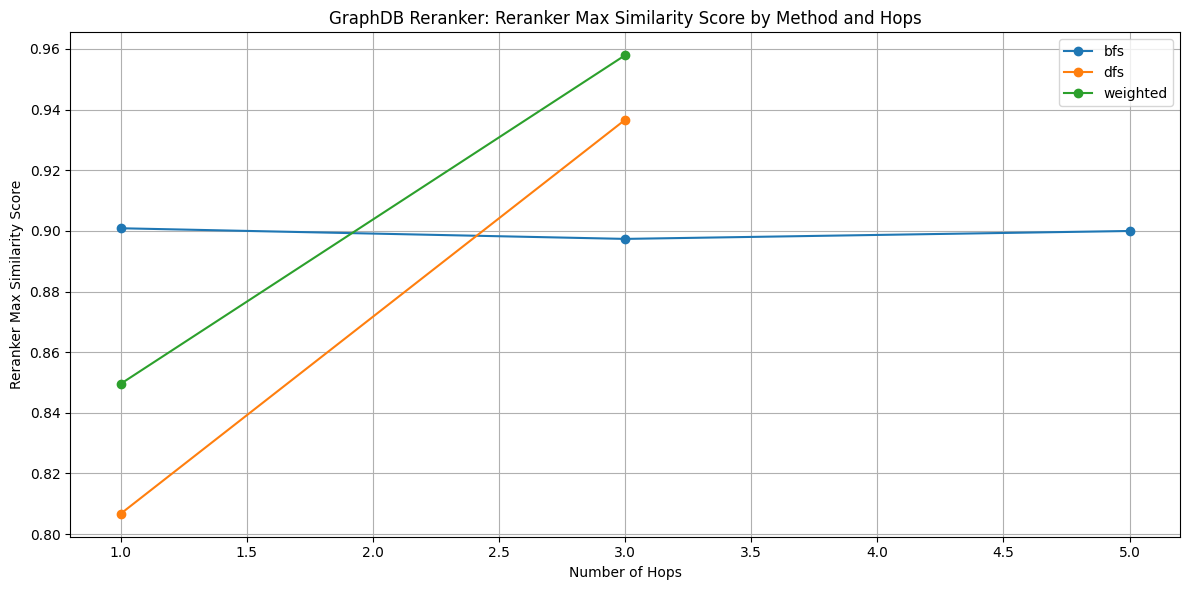

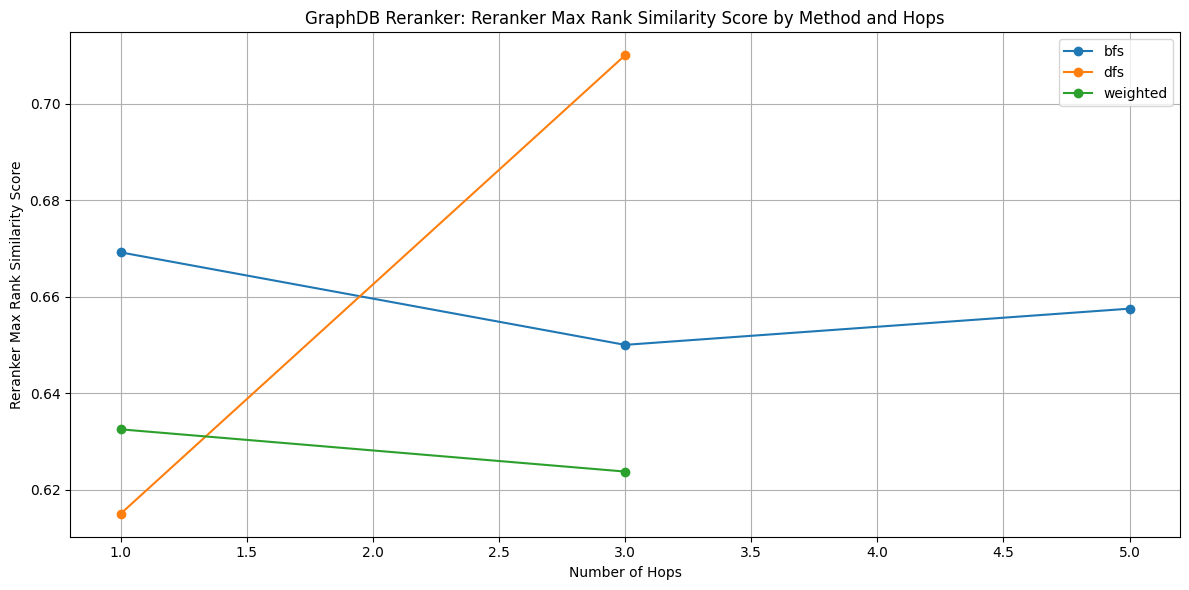

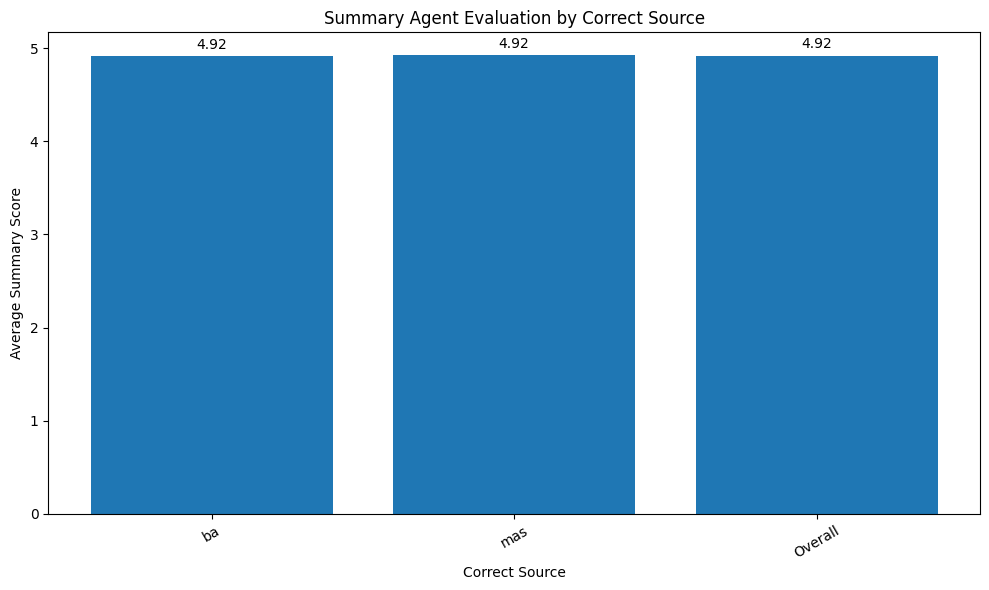

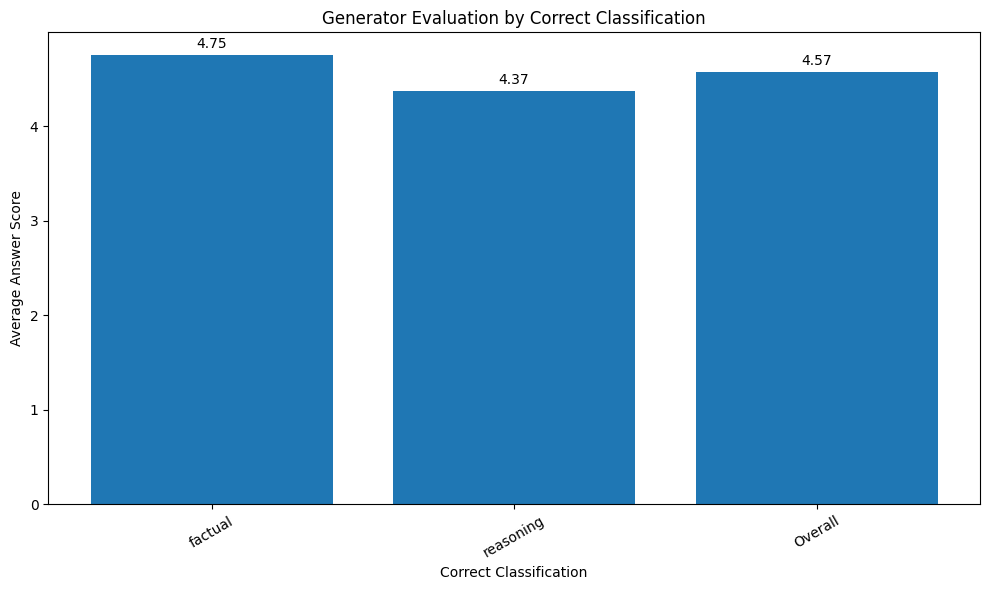

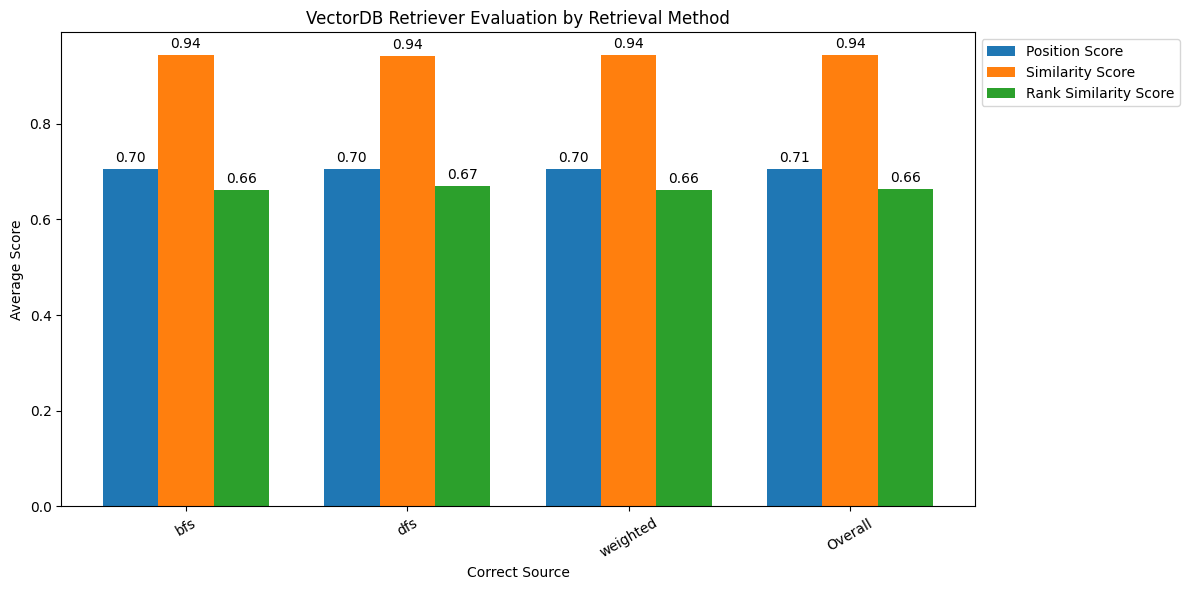

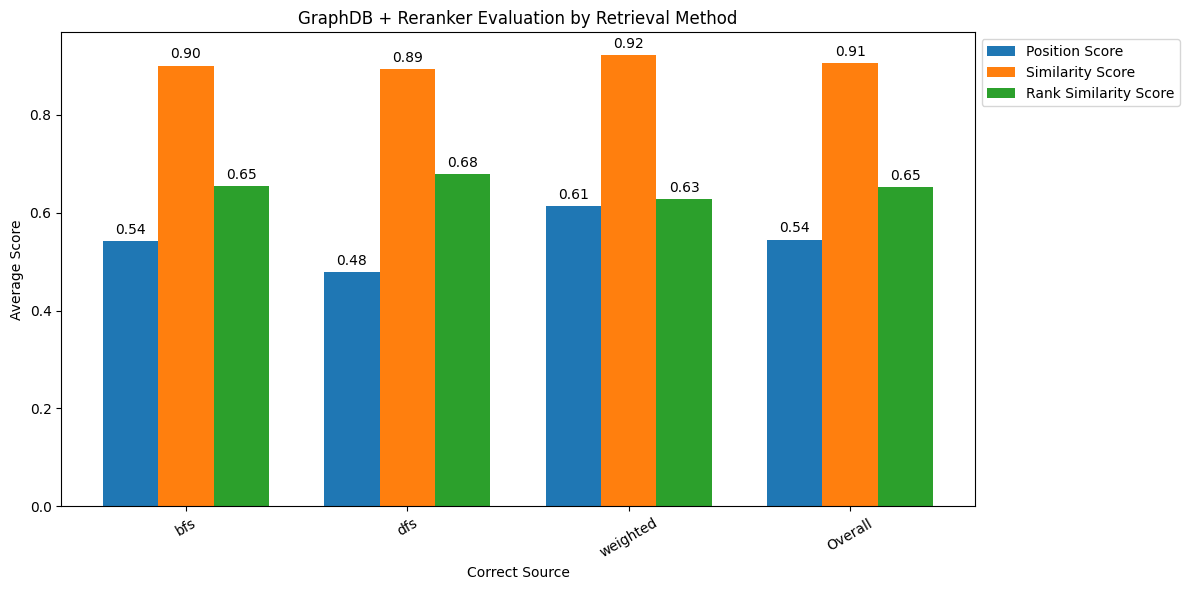

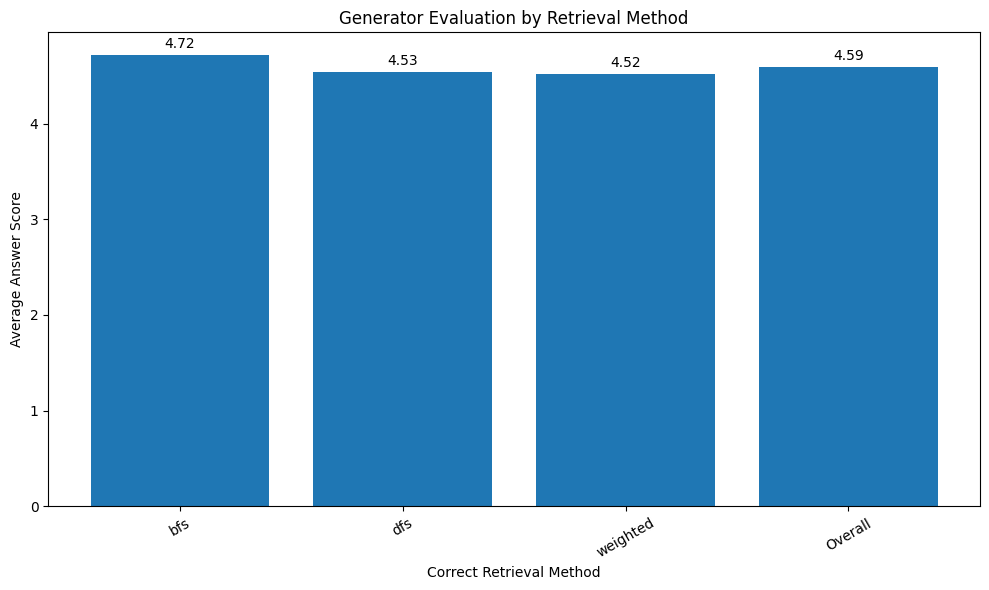

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your CSV
df = pd.read_csv("dsa4265 evaluation - final.csv")

# Convert relevant columns to numeric
cols_to_numeric = [
    'is_source_correct', 'is_type_correct',
    'retrieval_max_position_score', 'retrieval_max_similarity_score', 'retrieval_max_rank_similarity_score',
    'reranker_max_position_score', 'reranker_max_similarity_score', 'reranker_max_rank_similarity_score',
    'summary_score', 'answer_score'
]
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Function to plot bar charts
def plot_bar(data, x, y, title, xlabel, ylabel, rotation=0):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(data[x], data[y])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

# 1. Source Router Evaluation
source_router_eval = df.groupby('correct_source')['is_source_correct'].mean().reset_index()
source_router_eval.loc[len(source_router_eval)] = ['Overall', df['is_source_correct'].mean()]
plot_bar(source_router_eval, 'correct_source', 'is_source_correct',
         'Source Router: Proportion of Correct Source',
         'Correct Source', 'Proportion Correct', rotation=30)

# 2. Classify Query Evaluation
classify_query_eval = df.groupby('correct_type')['is_type_correct'].mean().reset_index()
classify_query_eval.loc[len(classify_query_eval)] = ['Overall', df['is_type_correct'].mean()]
plot_bar(classify_query_eval, 'correct_type', 'is_type_correct',
         'Classify Query: Proportion of Correct Type',
         'Correct Classification', 'Proportion Correct', rotation=30)

# # 3.1 VectorDB Retriever Evaluation (grouped bar chart)
# vector_scores = df.groupby('graphdb_retrieval_method')[
#     ['retrieval_max_position_score',
#      'retrieval_max_similarity_score',
#      'retrieval_max_rank_similarity_score']
# ].mean().reset_index()

# # Add overall row
# overall_vector_scores = df[
#     ['retrieval_max_position_score',
#      'retrieval_max_similarity_score',
#      'retrieval_max_rank_similarity_score']
# ].mean()
# vector_scores.loc[len(vector_scores)] = ['Overall'] + overall_vector_scores.tolist()

# # Plotting
# labels = vector_scores['graphdb_retrieval_method']
# x = np.arange(len(labels))  # label locations
# width = 0.25  # width of each bar

# fig, ax = plt.subplots(figsize=(12, 6))
# bar1 = ax.bar(x - width, vector_scores['retrieval_max_position_score'], width, label='Position Score')
# bar2 = ax.bar(x, vector_scores['retrieval_max_similarity_score'], width, label='Similarity Score')
# bar3 = ax.bar(x + width, vector_scores['retrieval_max_rank_similarity_score'], width, label='Rank Similarity Score')

# # Labels and title
# ax.set_xlabel('Correct Source')
# ax.set_ylabel('Average Score')
# ax.set_title('VectorDB Retriever Evaluation by Retrieval Method')
# ax.set_xticks(x)
# ax.set_xticklabels(labels, rotation=30)
# # ax.legend()
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1))


# # Add bar labels
# for bars in [bar1, bar2, bar3]:
#     for bar in bars:
#         height = bar.get_height()
#         ax.annotate(f'{height:.2f}',
#                     xy=(bar.get_x() + bar.get_width() / 2, height),
#                     xytext=(0, 3),  # offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# plt.tight_layout()
# plt.show()

# # 3.2 GraphDB + Reranker Retriever Evaluation (grouped bar chart)
# reranker_scores = df.groupby('graphdb_retrieval_method')[
#     ['reranker_max_position_score',
#      'reranker_max_similarity_score',
#      'reranker_max_rank_similarity_score']
# ].mean().reset_index()

# # Add overall row
# overall_reranker_scores = df[
#     ['reranker_max_position_score',
#      'reranker_max_similarity_score',
#      'reranker_max_rank_similarity_score']
# ].mean()
# reranker_scores.loc[len(reranker_scores)] = ['Overall'] + overall_reranker_scores.tolist()

# # Plotting
# labels = reranker_scores['graphdb_retrieval_method']
# x = np.arange(len(labels))  # label locations
# width = 0.25  # width of each bar

# fig, ax = plt.subplots(figsize=(12, 6))
# bar1 = ax.bar(x - width, reranker_scores['reranker_max_position_score'], width, label='Position Score')
# bar2 = ax.bar(x, reranker_scores['reranker_max_similarity_score'], width, label='Similarity Score')
# bar3 = ax.bar(x + width, reranker_scores['reranker_max_rank_similarity_score'], width, label='Rank Similarity Score')

# # Labels and title
# ax.set_xlabel('Correct Source')
# ax.set_ylabel('Average Score')
# ax.set_title('GraphDB + Reranker Evaluation by Retrieval Method')
# ax.set_xticks(x)
# ax.set_xticklabels(labels, rotation=30)
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# # Add bar labels
# for bars in [bar1, bar2, bar3]:
#     for bar in bars:
#         height = bar.get_height()
#         ax.annotate(f'{height:.2f}',
#                     xy=(bar.get_x() + bar.get_width() / 2, height),
#                     xytext=(0, 3),  # offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# plt.tight_layout()
# plt.show()

# 4. GraphDB Retriever and Reranker
graph_reranker_scores = df.groupby(['graphdb_retrieval_method', 'n_hops'])[
    ['reranker_max_position_score',
    'reranker_max_similarity_score',
    'reranker_max_rank_similarity_score']
].mean().reset_index()

for col in ['reranker_max_position_score', 'reranker_max_similarity_score', 'reranker_max_rank_similarity_score']:
    plt.figure(figsize=(12, 6))
    for method in graph_reranker_scores['graphdb_retrieval_method'].unique():
        subset = graph_reranker_scores[graph_reranker_scores['graphdb_retrieval_method'] == method]
        plt.plot(subset['n_hops'], subset[col], marker='o', label=method)
    plt.title(f'GraphDB Reranker: {col.replace("_", " ").title()} by Method and Hops')
    plt.xlabel('Number of Hops')
    plt.ylabel(col.replace("_", " ").title())
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 5. Summary Agent Evaluation (per correct_source + overall)
summary_score_eval = df.groupby('correct_source')['summary_score'].mean().reset_index()
summary_score_eval.columns = ['Source', 'Score']
summary_score_eval.loc[len(summary_score_eval)] = ['Overall', df['summary_score'].mean()]

plot_bar(summary_score_eval, 'Source', 'Score',
         'Summary Agent Evaluation by Correct Source',
         'Correct Source', 'Average Summary Score', rotation=30)

# 6. Generator Evaluation (per correct_source + overall)
generator_score_eval = df.groupby('correct_type')['answer_score'].mean().reset_index()
generator_score_eval.columns = ['Classification', 'Score']
generator_score_eval.loc[len(generator_score_eval)] = ['Overall', df['answer_score'].mean()]

plot_bar(generator_score_eval, 'Classification', 'Score',
         'Generator Evaluation by Correct Classification',
         'Correct Classification', 'Average Answer Score', rotation=30)

# Filter the hop to be the best hop for each person (more balanced and standardized to compare bfs, dfs, weighted)

victoria = df[df['person'] == 'victoria']
victoria = victoria[victoria['n_hops'] == victoria['n_hops'].mode()[0]]

zhihao = df[df['person'] == 'zhihao']
zhihao = zhihao[zhihao['n_hops'] == zhihao['n_hops'].mode()[0]]

shiyun = df[df['person'] == 'shiyun']
shiyun = shiyun[shiyun['n_hops'] == shiyun['n_hops'].mode()[0]]

hans = df[df['person'] == 'hans']
hans = hans[hans['n_hops'] == hans['n_hops'].mode()[0]]

terence = df[df['person'] == 'terence']
terence = terence[terence['n_hops'] == terence['n_hops'].mode()[0]]

hera = df[df['person'] == 'hera']
hera = hera[hera['n_hops'] == hera['n_hops'].mode()[0]]

all = [victoria, zhihao, shiyun, hans, terence, hera]
df_all = pd.concat([victoria, zhihao, shiyun, hans, terence, hera])

# 3. VectorDB Retriever Evaluation (grouped bar chart)
vector_scores = df_all.groupby('graphdb_retrieval_method')[
    ['retrieval_max_position_score',
     'retrieval_max_similarity_score',
     'retrieval_max_rank_similarity_score']
].mean().reset_index()

# Add overall row
overall_vector_scores = df_all[
    ['retrieval_max_position_score',
     'retrieval_max_similarity_score',
     'retrieval_max_rank_similarity_score']
].mean()
vector_scores.loc[len(vector_scores)] = ['Overall'] + overall_vector_scores.tolist()

# Plotting
labels = vector_scores['graphdb_retrieval_method']
x = np.arange(len(labels))  # label locations
width = 0.25  # width of each bar

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width, vector_scores['retrieval_max_position_score'], width, label='Position Score')
bar2 = ax.bar(x, vector_scores['retrieval_max_similarity_score'], width, label='Similarity Score')
bar3 = ax.bar(x + width, vector_scores['retrieval_max_rank_similarity_score'], width, label='Rank Similarity Score')

# Labels and title
ax.set_xlabel('Correct Source')
ax.set_ylabel('Average Score')
ax.set_title('VectorDB Retriever Evaluation by Retrieval Method')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30)
# ax.legend()
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))


# Add bar labels
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 3. GraphDB + Reranker Retriever Evaluation (grouped bar chart)
reranker_scores = df_all.groupby('graphdb_retrieval_method')[
    ['reranker_max_position_score',
     'reranker_max_similarity_score',
     'reranker_max_rank_similarity_score']
].mean().reset_index()

# Add overall row
overall_reranker_scores = df_all[
    ['reranker_max_position_score',
     'reranker_max_similarity_score',
     'reranker_max_rank_similarity_score']
].mean()
reranker_scores.loc[len(reranker_scores)] = ['Overall'] + overall_reranker_scores.tolist()

# Plotting
labels = reranker_scores['graphdb_retrieval_method']
x = np.arange(len(labels))  # label locations
width = 0.25  # width of each bar

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width, reranker_scores['reranker_max_position_score'], width, label='Position Score')
bar2 = ax.bar(x, reranker_scores['reranker_max_similarity_score'], width, label='Similarity Score')
bar3 = ax.bar(x + width, reranker_scores['reranker_max_rank_similarity_score'], width, label='Rank Similarity Score')

# Labels and title
ax.set_xlabel('Correct Source')
ax.set_ylabel('Average Score')
ax.set_title('GraphDB + Reranker Evaluation by Retrieval Method')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add bar labels
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

generator_score_eval = df_all.groupby('graphdb_retrieval_method')['answer_score'].mean().reset_index()
generator_score_eval.columns = ['Retrieval Method', 'Score']
generator_score_eval.loc[len(generator_score_eval)] = ['Overall', df_all['answer_score'].mean()]

plot_bar(generator_score_eval, 'Retrieval Method', 'Score',
         'Generator Evaluation by Retrieval Method',
         'Correct Retrieval Method', 'Average Answer Score', rotation=30)

In [70]:
for df in all:
    df_hop_score = df.groupby('n_hops')['answer_score'].mean().reset_index()
    best_hop = df_hop_score.sort_values(by=['answer_score'], ascending=[False]).iloc[0]['n_hops']
    print('Best hop:', int(best_hop))

Best hop: 3
Best hop: 1
Best hop: 1
Best hop: 3
Best hop: 3
Best hop: 3


In [68]:
for df in all:
    df_method_score = df.groupby('graphdb_retrieval_method')['answer_score'].mean().reset_index()
    best_method = df_method_score.sort_values(by=['answer_score'], ascending=[False]).iloc[0]['graphdb_retrieval_method']
    print('Best retrieval method:', best_method)

Best retrieval method: bfs
Best retrieval method: bfs
Best retrieval method: bfs
Best retrieval method: bfs
Best retrieval method: bfs
Best retrieval method: weighted
